# Importing Google Drive and Necessary Modules

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
!python --version

Python 3.8.15


In [5]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd 
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import datasets
from torchvision import models
import nltk
import gensim
from gensim.models import Word2Vec

# Importing and Aggregating Dataset
In order for the data to be properly loaded into the model, the posts must be tokenized and then vectorized using NLTK, google's word2vec model and then using standard scaler on all the values.

In [6]:
df = pd.read_csv('./drive/MyDrive/MLproject/mbti_1.csv')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [7]:
toDrop = df.index[df['type'] == None].tolist()
print(toDrop)
df.drop(toDrop, axis = 0, inplace = True)
print(df.index[df['type'] == None].tolist())

[]
[]


In [8]:
X = df['posts'].to_numpy()
y = df['type'].to_numpy()
y_save = y
print(y)

['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
X_tokenized = []
for posts in X:
  sent_tok = nltk.sent_tokenize(posts)
  word_tok = [nltk.word_tokenize(i) for i in sent_tok]
  word_tok = [word.lower() for sublist in word_tok for word in sublist if word.isalpha()]
  X_tokenized.append(word_tok)

In [11]:
bigmodel = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/MLproject/GoogleNews-vectors-negative300-SLIM.bin.gz', binary=True)

In [12]:
sent_vecs = []

for toks in X_tokenized:
  totvec = np.zeros(300)
  for tok in toks:
    if tok.lower() in bigmodel:
      totvec += bigmodel[tok.lower()]
  sent_vecs.append(totvec)

print(len(sent_vecs))
print(len(sent_vecs[0]))

8675
300


In [13]:
print(sent_vecs[0])

[  8.1716933    6.62324852   8.40468585  24.60579834 -11.37902975
  -2.2001989    6.98470684 -18.07261034  13.26591492  12.43653239
  -8.6005791  -23.94635958  -3.50449929   2.88226702 -21.74643173
   8.35808341   9.22985678  18.23743076   4.48678539 -11.08924301
  -5.76092879   9.71456013  -2.20838375  -1.65003526   6.66205163
  -0.03882378 -18.14680822  13.47064877   5.15344548   1.57389735
  -3.49429807   2.30958207  -6.62425505  -0.32624869   1.37072101
  -0.7876195   -0.40682639  -5.29863954   7.96546977  13.46870518
  18.27024669  -9.54075758  19.72043081  -3.15236473   0.79020919
  -0.20249922  -2.77003061   4.91561511   5.47035178   2.87014683
   0.20485603  12.32386618  -3.62899341  -2.40670157  -0.93175159
   9.90944245  -5.53731805  -8.1196819    9.50664584 -11.31177258
  -8.29748632  16.6773878  -15.64923984 -18.90895463  -5.78214327
  -1.47802229  -6.76852281  18.03324782  -7.02992296  14.97632517
  11.06545938   5.21661368  16.4276052    3.29156316 -23.47729727
 -15.49101

In [14]:
y_set = {x:0 for x in y}
y_count_set = {x:0 for x in y}
index = 0
print(y_set)
for values in y_set:
  y_set[values] = index
  index += 1
types = df['type'].to_numpy()
for t in range(len(types)):
  y_count_set[types[t]]+= 1
  if types[t] in y_set:
    types[t] = int(y_set[types[t]])
print(y_set)
y_count_set
inv_y = {v: k for k, v in y_set.items()}
inv_y

{'INFJ': 0, 'ENTP': 0, 'INTP': 0, 'INTJ': 0, 'ENTJ': 0, 'ENFJ': 0, 'INFP': 0, 'ENFP': 0, 'ISFP': 0, 'ISTP': 0, 'ISFJ': 0, 'ISTJ': 0, 'ESTP': 0, 'ESFP': 0, 'ESTJ': 0, 'ESFJ': 0}
{'INFJ': 0, 'ENTP': 1, 'INTP': 2, 'INTJ': 3, 'ENTJ': 4, 'ENFJ': 5, 'INFP': 6, 'ENFP': 7, 'ISFP': 8, 'ISTP': 9, 'ISFJ': 10, 'ISTJ': 11, 'ESTP': 12, 'ESFP': 13, 'ESTJ': 14, 'ESFJ': 15}


{0: 'INFJ',
 1: 'ENTP',
 2: 'INTP',
 3: 'INTJ',
 4: 'ENTJ',
 5: 'ENFJ',
 6: 'INFP',
 7: 'ENFP',
 8: 'ISFP',
 9: 'ISTP',
 10: 'ISFJ',
 11: 'ISTJ',
 12: 'ESTP',
 13: 'ESFP',
 14: 'ESTJ',
 15: 'ESFJ'}

In [15]:
maj = ''
max = 0
for values in y_count_set:
  if max < y_count_set[values]:
    max = y_count_set[values]
    maj = values

maj
max/ len(types), maj

(0.21118155619596543, 'INFP')

In [16]:
import random
random_baseline = [random.randint(0,16) for x in range(len(types))]

print(random_baseline)
counter = 0
num = random_baseline[0]
  
for i in random_baseline:
    curr_frequency = random_baseline.count(i)
    if(curr_frequency> counter):
        counter = curr_frequency
        num = i
print(counter/len(types),num)
# random_baseline = max(count_0_rand, count_1_rand) /len(types)
# print("Random Baseline:",random_baseline)

[4, 9, 9, 2, 15, 14, 13, 0, 10, 9, 0, 16, 13, 4, 13, 16, 3, 0, 11, 9, 13, 12, 10, 1, 16, 6, 0, 8, 0, 12, 4, 8, 0, 1, 5, 3, 0, 6, 4, 12, 14, 7, 4, 14, 0, 12, 5, 2, 3, 16, 12, 4, 9, 16, 3, 9, 10, 2, 8, 16, 14, 14, 7, 2, 11, 2, 16, 7, 13, 15, 9, 9, 4, 12, 16, 11, 13, 3, 16, 15, 16, 16, 13, 5, 8, 1, 13, 1, 13, 4, 15, 12, 5, 7, 15, 6, 13, 15, 11, 13, 2, 16, 13, 4, 15, 14, 6, 14, 14, 14, 8, 11, 5, 6, 9, 5, 9, 13, 6, 9, 15, 5, 13, 6, 8, 6, 9, 12, 12, 11, 1, 0, 3, 0, 2, 13, 2, 13, 16, 6, 15, 15, 7, 8, 9, 14, 4, 13, 3, 3, 5, 8, 16, 14, 6, 4, 6, 16, 12, 15, 11, 5, 8, 14, 1, 6, 10, 4, 11, 5, 16, 16, 4, 4, 11, 4, 13, 12, 10, 7, 8, 15, 5, 3, 3, 13, 0, 7, 1, 5, 4, 16, 9, 10, 1, 6, 10, 8, 11, 15, 8, 5, 11, 16, 1, 13, 8, 1, 3, 6, 7, 16, 14, 13, 7, 14, 5, 11, 3, 3, 2, 0, 7, 13, 15, 11, 7, 16, 10, 12, 11, 3, 8, 8, 11, 1, 10, 3, 0, 13, 5, 12, 9, 7, 5, 0, 1, 7, 12, 16, 1, 4, 7, 10, 6, 14, 16, 4, 16, 1, 9, 8, 7, 1, 11, 0, 16, 7, 4, 9, 10, 2, 3, 12, 5, 8, 1, 16, 3, 8, 6, 8, 1, 3, 14, 14, 10, 10, 14, 0, 16, 

In [ ]:
df

,type,posts
0,0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,1,'I'm finding the lack of me in these posts ver...
2,2,'Good one _____ https://www.youtube.com/wat...
3,3,"'Dear INTP, I enjoyed our conversation the o..."
4,4,'You're fired.|||That's another silly misconce...
...,...,...
8670,8,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,7,'So...if this thread already exists someplace ...
8672,2,'So many questions when i do these things. I ...
8673,6,'I am very conflicted right now when it comes ...


In [ ]:
introvert = len([x for x in df['type'].to_numpy() if x[0] == 'I'])
extrovert = len([x for x in df['type'].to_numpy() if x[0] == 'E'])

intuitive = len([x for x in df['type'].to_numpy() if x[1] == 'N'])
observant = len([x for x in df['type'].to_numpy() if x[1] == 'S'])

thinking = len([x for x in df['type'].to_numpy() if x[2] == 'T'])
feeling = len([x for x in df['type'].to_numpy() if x[2] == 'F'])

judging = len([x for x in df['type'].to_numpy() if x[3] == 'J'])
prospecting = len([x for x in df['type'].to_numpy() if x[3] == 'P'])

positive = len([x for x in df['type'].to_numpy() if random.randint(0,1) == 1]) / len(types) 
negative = len([x for x in df['type'].to_numpy() if random.randint(0,1) == 0]) / len(types)
positive, negative

TypeError: ignored

In [ ]:
types = list(types)
df = pd.DataFrame({'posts': X, 'word embeddings per post': sent_vecs, 'type': y_save,'integer converted types': types})
df.to_csv('/content/drive/MyDrive/MLproject/embedded_MBTI.csv',index = False)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sent_vecs = sc.fit_transform(sent_vecs)

# Loading Data into DataLoader
Before loading data into dataloader, the training and test set are shuffled divided on an 80-20 split. Each dataset is converted to a tensor, with all x values being float32 while all the y values being int64. This convention is used because of the requirements set by the loss function. 

In [18]:
indexes = np.array(range(len(y)))
np.random.shuffle(indexes)
print(types)
X_shuffled = []
y_shuffled = []
dataset = []
shuffled_dataset = []
for i in range(len(y)):
  dataset.append((torch.tensor(sent_vecs[i], dtype = torch.float32),
                  torch.tensor(y[i], dtype = torch.int64)))
for i in range(len(dataset)):
  shuffled_dataset.append(dataset[indexes[i]])
  X_shuffled.append(sent_vecs[indexes[i]])
  y_shuffled.append(y[indexes[i]])

train_set = dataset[0:int(len(shuffled_dataset) * .8)]
test_set = dataset[int(len(shuffled_dataset) * .8):]
X_test = X_shuffled[int(len(shuffled_dataset) * .8):]
y_test = y_shuffled[int(len(shuffled_dataset) * .8):]
print(len(X_test),len(test_set),len(y_test))
x_test = np.array(X_test)

[0 1 2 ... 2 6 6]
1735 1735 1735


In [19]:
len(train_set),len(test_set)
print(train_set[40][1])

tensor(9)


In [20]:
y_test = torch.tensor(y_test, dtype = torch.float32)
x_test = torch.tensor(x_test,dtype=torch.float32)

In [21]:
trainset = torch.utils.data.DataLoader(train_set,batch_size = 20, shuffle = True, num_workers = 2)
testset = torch.utils.data.DataLoader(test_set,batch_size = 20, shuffle = False, num_workers = 2)

for images, labels in trainset:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([20, 300])
torch.Size([20])


# Deep Feed Forward Neural Networks
Three different Deep FFNNs were created, one vanilla FFNN, one with Dropout, one with batch normalization. Each was trained for 400 epochs with a learning rate of 0.01. accuracies and losses were plotted.

In [ ]:
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,128)
    self.fc4 = nn.Linear(128,256)
    self.fc5 = nn.Linear(256,16)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

In [ ]:
device = torch.device('cuda')

In [ ]:
learning_rate = 0.01
epochs = 400
# Model , Optimizer, Loss
model = Net(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
x_test = x_test.to(device)
y_test = y_test.to(device)

In [ ]:
losses = []
accur = []
model.eval()
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)
    #accuracy
    output = model(x_test)
    _, predicted = torch.max(output, dim=1)
    accuracy = torch.tensor(torch.sum(predicted == y_test).item() / len(predicted))
    comparer1 = predicted.cpu().reshape(-1).detach().numpy()
    comparer2 = y_test.cpu().numpy()
    true_pos = [v for v in range(len(comparer1)) if comparer1[v] == 1 and comparer1[v] == comparer2[v]]
    false_pos = [v for v in range(len(comparer1)) if comparer1[v] == 1 and comparer1[v] != comparer2[v]]
    false_neg = [v for v in range(len(comparer1)) if comparer1[v] == 0 and comparer1[v] != comparer2[v]]
    true_neg = [v for v in range(len(comparer1)) if comparer1[v] == 0 and comparer1[v] == comparer2[v]]
    acc = (len(true_pos) + len(true_neg))/(len(true_pos) + len(true_neg) + len(false_pos) + len(false_neg))
    recall = len(true_pos) /(len(true_pos) + len(false_pos))
    precision = len(true_pos) / (len(true_pos) + len(false_pos))
    f1_score = (2 * precision * recall) / (precision + recall)
    print(acc, accuracy)
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
    break
  break
  losses.append(loss)
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 2.2668232917785645	 accuracy : 0.19481268525123596
epoch 50	loss : 1.3426140546798706	 accuracy : 0.41786742210388184
epoch 100	loss : 1.2582701444625854	 accuracy : 0.5314121246337891
epoch 150	loss : 0.6918178796768188	 accuracy : 0.6409221887588501
epoch 200	loss : 1.0599439144134521	 accuracy : 0.7314121127128601
epoch 250	loss : 0.2510921359062195	 accuracy : 0.8103746175765991
epoch 300	loss : 0.5348312854766846	 accuracy : 0.7475504279136658
epoch 350	loss : 0.3018184304237366	 accuracy : 0.8282420635223389


In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

A Loss of 0.957 and Accuracy of 0.745 After 400 Epochs


In [ ]:
loss = []
for v in range(len(losses)):
  loss.append(losses[v].cpu().detach())

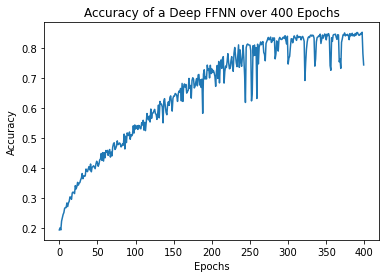

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep FFNN over 400 Epochs')
plt.show()

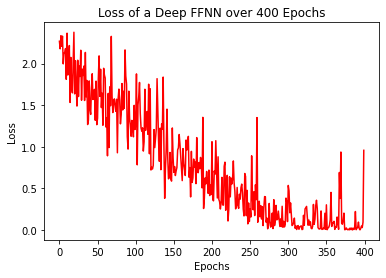

In [ ]:
plt.plot(range(0,400),loss, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep FFNN over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/FFNN')

In [ ]:
class DropNet(nn.Module):
  def __init__(self,input_shape):
    super(DropNet,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,128)
    self.fc4 = nn.Linear(128, 256)
    self.fc5 = nn.Linear(256,16)
    self.dropout = nn.Dropout(0.01)
  
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.dropout(x)
    x = self.fc5(x)
    return x

In [ ]:
learning_rate = 0.01
epochs = 400
# Model , Optimizer, Loss
model = DropNet(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
losses = []
accur = []
model.eval()
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)
    #accuracy
    output = model(x_test)
    _, preds = torch.max(output, dim=1)
    acc = torch.tensor(torch.sum(preds == y_test).item() / len(preds))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
  losses.append(loss.cpu().detach())
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 2.659132480621338	 accuracy : 0.19481268525123596
epoch 50	loss : 1.441857099533081	 accuracy : 0.4472622573375702
epoch 100	loss : 1.1284382343292236	 accuracy : 0.5394812822341919
epoch 150	loss : 1.0751283168792725	 accuracy : 0.6374639868736267
epoch 200	loss : 0.7916804552078247	 accuracy : 0.6755043268203735
epoch 250	loss : 0.42318183183670044	 accuracy : 0.790201723575592
epoch 300	loss : 0.18261101841926575	 accuracy : 0.8155619502067566
epoch 350	loss : 0.27945786714553833	 accuracy : 0.7798271179199219


In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

A Loss of 0.515 and Accuracy of 0.778 After 400 Epochs


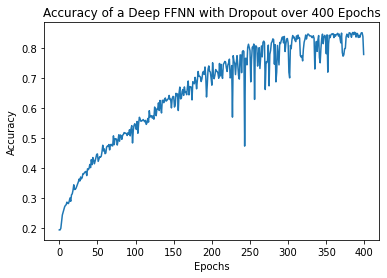

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep FFNN with Dropout over 400 Epochs')
plt.show()

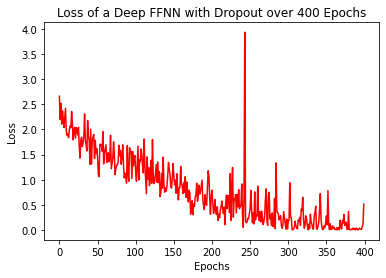

In [ ]:
plt.plot(range(0,400), losses, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep FFNN with Dropout over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/DropoutFFNN')

In [ ]:
class DeepBatchNormNet(nn.Module):
  def __init__(self,input_shape):
    super(DeepBatchNormNet,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.b1 = nn.BatchNorm1d(32)
    self.fc2 = nn.Linear(32,64)
    self.b2 = nn.BatchNorm1d(64)
    self.fc3 = nn.Linear(64,128)
    self.b3 = nn.BatchNorm1d(128)
    self.fc4 = nn.Linear(128, 256)
    self.b4 = nn.BatchNorm1d(256)
    self.fc5 = nn.Linear(256,16)
    self.dropout = nn.Dropout(0.01)
  
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.b1(x)
    x = torch.relu(self.fc2(x))
    x = self.b2(x)
    x = torch.relu(self.fc3(x))
    x = self.b3(x)
    x = torch.relu(self.fc4(x))
    x = self.b4(x)
    x = self.dropout(x)
    x = self.fc5(x)

    return x

In [ ]:
learning_rate = 0.01
epochs = 400
# Model , Optimizer, Loss
model = DeepBatchNormNet(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
losses = []
accur = []
model.eval()
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)  
    #accuracy
    output = model(x_test)
    _, preds = torch.max(output, dim=1)
    acc = torch.tensor(torch.sum(preds == y_test).item() / len(preds))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
  losses.append(loss.cpu().detach())
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 2.4045727252960205	 accuracy : 0.22420749068260193
epoch 50	loss : 1.3642327785491943	 accuracy : 0.4363112449645996
epoch 100	loss : 1.4512741565704346	 accuracy : 0.5458213090896606
epoch 150	loss : 1.2261173725128174	 accuracy : 0.6536023020744324
epoch 200	loss : 0.6756585836410522	 accuracy : 0.7048991322517395
epoch 250	loss : 0.09960408508777618	 accuracy : 0.8345821499824524
epoch 300	loss : 0.2447996884584427	 accuracy : 0.7556195855140686
epoch 350	loss : 0.0200309120118618	 accuracy : 0.8438040614128113


In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

A Loss of 0.051 and Accuracy of 0.843 After 400 Epochs


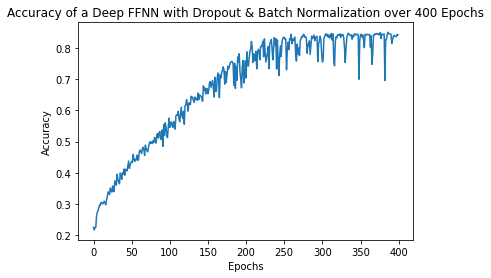

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep FFNN with Dropout & Batch Normalization over 400 Epochs')
plt.show()

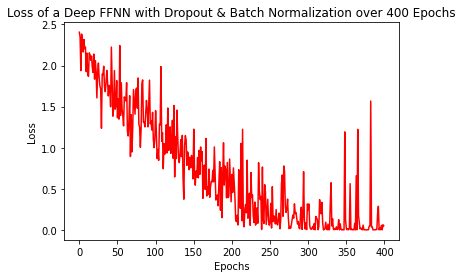

In [ ]:
plt.plot(range(0,400), losses, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep FFNN with Dropout & Batch Normalization over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/BatchNormFFNN')

# Deep Recurrent Neural Networks
Three different Deep RNNs were created, one vanilla RNN, one with Dropout, one with batch normalization. Each was trained for 400 epochs with a learning rate of 0.01. accuracies and losses were plotted.

In [ ]:
class DeepRNN(nn.Module):
  def __init__(self,input_shape):
    super(DeepRNN,self).__init__()
    self.rnn1 = nn.RNN(input_shape, 32, 1, batch_first = True) 
    self.fc1 = nn.Linear(32, 64)
    self.rnn2 = nn.RNN(64, 128,1,batch_first = True)
    self.fc2 = nn.Linear(128,256)
    self.rnn3 = nn.RNN(256,512,1,batch_first = True)
    self.fc3 = nn.Linear(512, 16)
  
  def forward(self,x):
    hidden = self.init_hidden(1,32)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn1(x,hidden)
    x = x.contiguous().view(-1, 32)
    x = self.fc1(x)

    hidden = self.init_hidden(1,128)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn2(x,hidden)
    x = x.contiguous().view(-1, 128)
    x = self.fc2(x)

    hidden = self.init_hidden(1,512)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn3(x,hidden)
    x = x.contiguous().view(-1, 512)
    x = self.fc3(x)
    
    return x, hidden 
  
  def init_hidden(self, batch_size, hidden_dim):
    hidden = torch.zeros(1,batch_size, hidden_dim)
    return hidden

In [ ]:
learning_rate = 0.01
epochs = 400 
# Model , Optimizer, Loss
model = DeepRNN(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output, _ = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)
    #accuracy
    output, _ = model(x_test)
    _, preds = torch.max(output, dim=1)
    acc = torch.tensor(torch.sum(preds == y_test).item() / len(preds))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
  losses.append(loss.cpu().detach())
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 2.2195322513580322	 accuracy : 0.22420749068260193
epoch 50	loss : 1.476291537284851	 accuracy : 0.4080691635608673
epoch 100	loss : 1.5784281492233276	 accuracy : 0.46512967348098755
epoch 150	loss : 1.0974860191345215	 accuracy : 0.5498558878898621
epoch 200	loss : 0.9793789982795715	 accuracy : 0.6230547428131104
epoch 250	loss : 0.6382555961608887	 accuracy : 0.6818443536758423
epoch 300	loss : 0.3670579791069031	 accuracy : 0.729682981967926
epoch 350	loss : 0.31728595495224	 accuracy : 0.7953890562057495


In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

A Loss of 0.454 and Accuracy of 0.758 After 400 Epochs


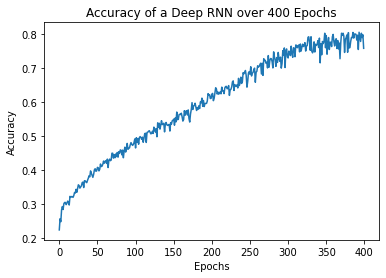

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep RNN over 400 Epochs')
plt.show()

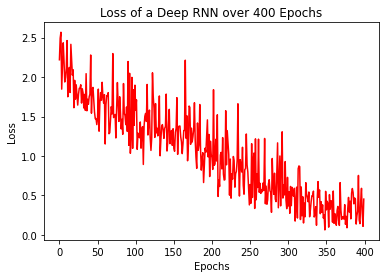

In [ ]:
plt.plot(range(0,400), losses, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep RNN over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/RNN')

In [22]:
class DeepDropoutRNN(nn.Module):
  def __init__(self,input_shape):
    super(DeepDropoutRNN,self).__init__()
    self.rnn1 = nn.RNN(input_shape, 32, 1, batch_first = True) 
    self.fc1 = nn.Linear(32, 64)
    self.rnn2 = nn.RNN(64, 128,1,batch_first = True)
    self.fc2 = nn.Linear(128,16)
    self.drop = nn.Dropout(0.01)
  
  def forward(self,x):
    hidden = self.init_hidden(1,32)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn1(x,hidden)
    x = x.contiguous().view(-1, 32)
    x = self.fc1(x)

    hidden = self.init_hidden(1,128)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn2(x,hidden)
    x = x.contiguous().view(-1, 128)
    x = self.drop(x)
    x = self.fc2(x)

    return x, hidden 
  
  def init_hidden(self, batch_size, hidden_dim):
    hidden = torch.zeros(1,batch_size, hidden_dim)
    return hidden

In [ ]:
learning_rate = 0.01
epochs = 400
# Model , Optimizer, Loss
model = DeepDropoutRNN(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
accur = []
losses =[] 
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output, _ = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)
    #accuracy
    output, _ = model(x_test)
    _, preds = torch.max(output, dim=1)
    acc = torch.tensor(torch.sum(preds == y_test).item() / len(preds))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
  losses.append(loss.cpu().detach())
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 2.4259860515594482	 accuracy : 0.23573486506938934
epoch 50	loss : 1.9996821880340576	 accuracy : 0.40288183093070984
epoch 100	loss : 1.291113257408142	 accuracy : 0.4985590875148773
epoch 150	loss : 0.8131561279296875	 accuracy : 0.5417867302894592
epoch 200	loss : 0.8688090443611145	 accuracy : 0.6144092082977295
epoch 250	loss : 0.8050611615180969	 accuracy : 0.6783861517906189
epoch 300	loss : 0.6065656542778015	 accuracy : 0.7613832950592041
epoch 350	loss : 0.3136520981788635	 accuracy : 0.7867435216903687


In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

A Loss of 0.2 and Accuracy of 0.781 After 400 Epochs


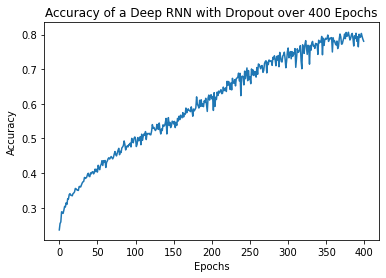

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep RNN with Dropout over 400 Epochs')
plt.show()

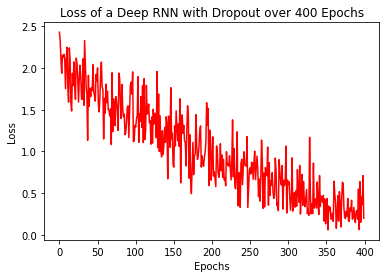

In [ ]:
plt.plot(range(0,400), losses, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep RNN with Dropout over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/DropoutRNN')

In [ ]:
class DeepBatchNormRNN(nn.Module):
  def __init__(self,input_shape):
    super(DeepBatchNormRNN,self).__init__()
    self.rnn1 = nn.RNN(input_shape, 32, 1, batch_first = True) 
    self.fc1 = nn.Linear(32, 64)
    self.b1 = nn.BatchNorm1d(64)
    self.rnn2 = nn.RNN(64, 128,1,batch_first = True)
    self.fc2 = nn.Linear(128,256)
    self.b2 = nn.BatchNorm1d(256)
    self.fc3 = nn.Linear(256, 16)
    self.drop = nn.Dropout(0.01)
  
  def forward(self,x):
    hidden = self.init_hidden(1,32)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn1(x,hidden)
    x = x.contiguous().view(-1, 32)
    x = self.fc1(x)
    x = self.b1(x)

    hidden = self.init_hidden(1,128)
    x = torch.unsqueeze(x, dim = 0)
    hidden = hidden.to(device)
    x, hidden = self.rnn2(x,hidden)
    x = x.contiguous().view(-1, 128)
    x = self.fc2(x)
    x = self.b2(x)
    
    x = self.drop(x)
    x = self.fc3(x)

    return x, hidden 
  
  def init_hidden(self, batch_size, hidden_dim):
    hidden = torch.zeros(1,batch_size, hidden_dim)
    return hidden

In [ ]:
learning_rate = 0.01
epochs = 400
# Model , Optimizer, Loss
model = DeepBatchNormRNN(input_shape=x_test.shape[1])
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

RuntimeError: ignored

In [ ]:
accur = []
losses = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    #calculate output
    output, _ = model(x_train)
    #calculate loss
    loss = loss_fn(output,y_train)
    #accuracy
    output, _ = model(x_test)
    _, preds = torch.max(output, dim=1)
    # preds = torch.max(predicted, dim = 1)
    #print(y_test, preds)
    acc = torch.tensor(torch.sum(preds == y_test).item() / len(preds))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    loss.detach()
    x_train.detach()
    y_train.detach()
    optimizer.step()
  losses.append(loss.cpu().detach())
  accur.append(acc)
  if i % 50 == 0:
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

RuntimeError: ignored

In [ ]:
print('A Loss of {} and Accuracy of {} After 400 Epochs'.format(round(float(losses[-1]),3),round(float(accur[-1]),3)))

NameError: ignored

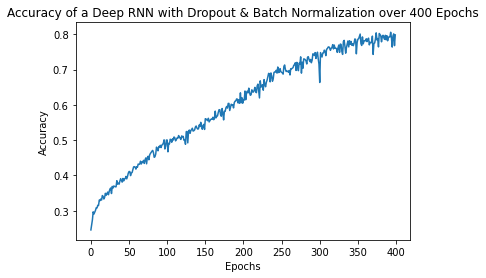

In [ ]:
plt.plot(range(0,400), accur)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Deep RNN with Dropout & Batch Normalization over 400 Epochs')
plt.show()

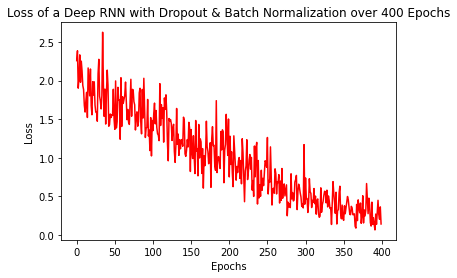

In [ ]:
plt.plot(range(0,400), losses, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of a Deep RNN with Dropout & Batch Normalization over 400 Epochs')
plt.show()

In [ ]:
torch.save(model.state_dict(),'./drive/MyDrive/MLproject/BatchNormRNN')

In [23]:
import random

def predict_sent(model):
  ind = random.randrange(0,len(X))
  print(X[ind])
  x = torch.tensor(sent_vecs,dtype = torch.float32)
  output, _ = model(x[ind].unsqueeze(dim = 0))
  _, preds = torch.max(output, dim=1)
  print(inv_y[int(preds[0])],inv_y[y[ind]])

In [24]:
model = DeepDropoutRNN(input_shape=x_test.shape[1])
device = torch.device('cpu')
model.load_state_dict(torch.load('./drive/MyDrive/MLproject/DropoutRNN', map_location=device))

<All keys matched successfully>

In [29]:
predict_sent(model)

'Lol ok, I will humor the idea.  Just because your intp doesn't mean your hobbies only relate to the stereotypical ones.  I have all the stereotypical ones including love all things technological...|||This is possibly just a phase where I feel the need to fill some void in my life and it will pass with time.  However it couldn't hurt if I don't happen upon a pot of gold while traveling down this...|||No I have not, any particular logic behind the suggestion?  Perhaps you feel I am showing an exorbitant amount of s but believe me I test n on everything.   However with age I am seeing a shift, the...|||Yeah I see your point but what better place to find someone who shares similarities when you are not looking for a date...  Entrepreneurial idea: website to find friends not just dates ;)|||What I hoped to find was a meaningful connection to someone who thinks like myself since that is lacking from my real life.  Obviously the limitations of the Internet and real life present hurdles...|||